In [33]:
!pip install fastbook
from fastbook import *


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
#search images using duck duck go scrapper
urls = search_images_ddg('bird photos', max_images=1)
print(len(urls), urls[0])

1 https://www.almanac.com/sites/default/files/image_nodes/bluebird-3456115_1920.jpg


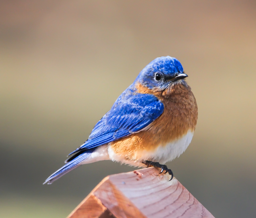

In [35]:
dest = Path('bird.jpg')
if not dest.exists():
  download_url(urls[0], dest, show_progress=False)

im = Image.open(dest)
im.to_thumb(256,256)

#images are made up of 2d matrix with 0-256 color

In [36]:
import os
from pathlib import Path

searches = 'forest', 'bird'
path = Path('bird_or_not')

if not path.exists():
  path.mkdir()

for o in searches:
  dest = (path / o)
  results = search_images_ddg(f'{o} photo')
  download_images(dest, urls=results[:200])
  resize_images(dest, max_size=400, dest=path/o)


In [37]:
# broken images break the NN so this is used to discard all broken images
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#8) [None,None,None,None,None,None,None,None]

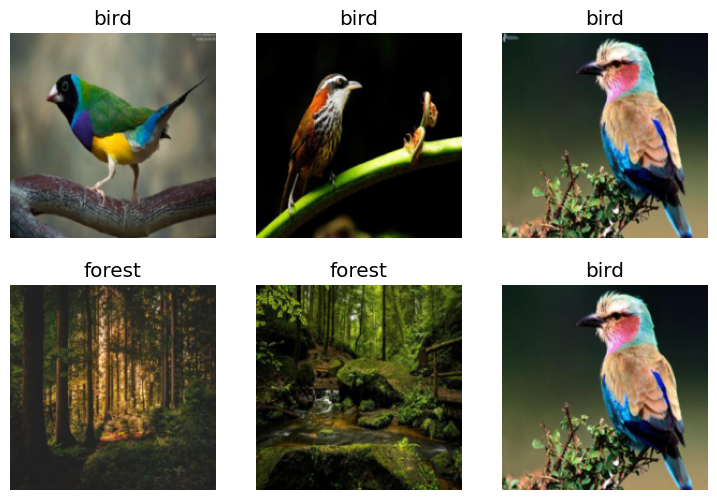

In [38]:
# Data block gives fast ai to give all parameters to create a data vision model dataset
dls = DataBlock(
    blocks = (ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = [Resize(192, method='squish')]
).dataloaders(path)
#data block gives batches of data to ai model
dls.show_batch(max_n=6)

In [39]:
learn = vision_learner(dls, resnet18, metrics=error_rate)



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [40]:
# fine_tune() teach the model the differeces between your model and what it is built for
# adjusts the weights accordingly
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.552039,0.096212,0.026490,01:39


epoch,train_loss,valid_loss,error_rate,time
0,0.012626,0.004931,0.000000,02:30
1,0.006743,0.000434,0.000000,02:23
2,0.004996,0.000253,0.000000,02:43


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fb31c2f7e20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


In [41]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg')) #predict whether it is a bird or not
print(f'This is a: {is_bird}. ')
print(f'Probability it is a bird: {probs[0]:.4f}')

This is a: bird. 
Probability it is a bird: 1.0000


In [42]:
# PaLM (Pathways Language Models)
# image based algo are not only for images. It can also be used to classify sounds
# take time series and create pictures from it
# mouse movements to make images and apply image classifiers

# Adam Optimizer in pytorch


Segmentation is where we take photos and predict every pixels of the photo
To create a segmentation Model:
    use model SegmentationDataLoaders() in the fast ai library which takes a function for labeling 


Apart from Pictures, tabular analysis(excel sheets) can also be used by the fast ai library. For income prediction for excel file we use TabularDataLoaders() in which we have to specify the columns. 
and the model is tabular_learning() and then call the fit_one_cycle() function.

Moreover, Collaborative filtering in recommendation system is also used. 
Similar items in the sense of people who liked the same type of music.
CollabDataLoaders() and collab_learner() model which takes data block and the range of the data it is predicting,  and then use fine_tune() 